## Tutorial for getting started with EEG data

### 1. Import EEG data into python

This tutorial walks through some basic commands for analyzing EEG data with python & MNE

In [2]:
import mne 

In [4]:
# Folder & files containing the data:
data_path = '/home/tyler/courses_pip2018ml/neuro_course/'
data_file = '817_1_PDDys_ODDBALL_Clean_curated'

filename = data_path + data_file

# We read the EEG epochs:
epochs = mne.read_epochs(filename + '.fif')

This filename (/home/tyler/courses_pip2018ml/neuro_course/817_1_PDDys_ODDBALL_Clean_curated.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
Reading /home/tyler/courses_pip2018ml/neuro_course/817_1_PDDys_ODDBALL_Clean_curated.fif ...
    Found the data of interest:
        t =    -100.00 ...     500.00 ms
        0 CTF compensation matrices available


<ipython-input-4-55563b0d0fee>:8: RuntimeWarning: This filename (/home/tyler/courses_pip2018ml/neuro_course/817_1_PDDys_ODDBALL_Clean_curated.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(filename + '.fif')


189 matching events found
No baseline correction applied
189 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


The epoch files contain informatin about the recording, experimental conditions, channels, and finally the data. General infomation on the data can be accessed via the following command. Which fields do you recognize?

In [5]:
epochs.info

<Info | 18 non-empty fields
    bads : list | 0 items
    ch_names : list | Fp1, Fz, F3, F7, FC5, FC1, C3, T7, CP5, ...
    chs : list | 60 items (EEG: 60)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    dig : list | 60 items
    events : list | 0 items
    file_id : dict | 4 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 250.0 Hz
    meas_id : dict | 4 items
    nchan : int | 60
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 500.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    experimenter : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_date : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneType
    xplotter_layout : NoneTyp

The EEG data are now organized in epochs, and they can be accessed via:

In [6]:
# The data can be accessed via:
epochs._data

array([[[ 3.52394723e-06,  2.06192612e-06,  4.46908902e-06, ...,
          2.96665620e-06,  2.16401624e-06,  1.87072610e-06],
        [ 4.50709437e-06,  4.35066937e-06,  6.42107294e-06, ...,
          3.37508463e-06,  3.61751079e-06,  7.65960632e-07],
        [-1.29490099e-05,  1.14769172e-06,  7.53064344e-06, ...,
          9.18080709e-06,  9.31064699e-06,  7.09726427e-06],
        ...,
        [ 4.06841724e-07,  2.90893554e-06,  4.71284770e-06, ...,
          9.70285413e-06,  6.65089987e-06,  5.53862809e-06],
        [-3.15314721e-06, -3.34791898e-06,  2.23534035e-06, ...,
          6.38878630e-06,  3.25191187e-06, -5.72537182e-07],
        [ 5.18393038e-06,  3.53263568e-06,  3.91299509e-06, ...,
         -8.49513529e-06, -8.71153162e-06, -9.73261926e-06]],

       [[ 1.03230610e-05,  6.71308611e-06,  4.06666993e-06, ...,
          1.60698795e-05,  9.03341291e-06,  8.83130644e-06],
        [ 1.22205867e-05,  1.32242498e-05,  1.39072570e-05, ...,
          2.48241805e-06,  8.66339622e

Data are stored as a 3-D matrix, containing: [number_epochs, number_electrodes, number of time-points]. You can double-check the number of each element by using the command .shape : 

In [7]:
data = epochs._data
print("Found " + str(data.shape[0]) + " epochs..." )
print("over " + str(data.shape[1]) + " electrodes..." )
print("for " + str(data.shape[2]) + " time-points" )

Found 189 epochs...
over 60 electrodes...
for 301 time-points


##### Exercise: Can you plot the first epoch of the first channel across time?

###### Hint: if you're using matplotlib.pyplot remember %matplotlib tk

(301,)


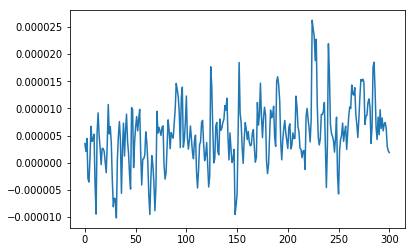

In [19]:
import matplotlib.pyplot as mpl
ep = 0
electr_id = 0
data_first_ep = data[ep, electr_id, :]
print(data_first_ep.shape)
mpl.plot(data_first_ep)
mpl.show()

Another useful feature is knowing which condition do our epochs belong to. You can retrieve this information by using 'epochs.events':

In [22]:
events = epochs.events[:, 2]

The first column on epochs.events is the time when an epoch occured in the recording, and the third the event code. The labels of each event code can be accessed with:

In [23]:
epochs.event_id

{'Standard': 201, 'Target': 200, 'Novel': 202}

##### Exercise: can you find how many epochs are there for each condition?

In [35]:
import numpy as np
len(np.where(events == 202)[0])

30

##### Exercise: Going back to the plots, can you now plot the first epoch of the Standard condition?


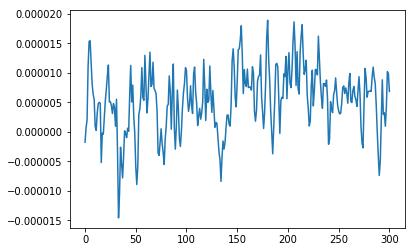

In [36]:
mpl.plot(data[159, 0, :])
mpl.show()

### 2. Using MNE functions

MNE has several build-in functions to give similar plots and to process the data. For example, the following cell selects all the epochs of the 'Standard' condition and plots their mean:

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-38-ad24e3e791c9>:8: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  St_mean.plot()


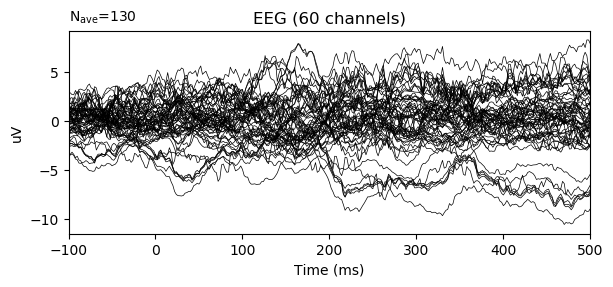

In [38]:
# Select all the standard epochs, in a dictionary-like way:
St_epochs = epochs['Standard']

# Average them:
St_mean = St_epochs.average()
%matplotlib tk
# Plot their mean:
St_mean.plot()

###### Exercise: can you now plot the means of all epoch types?

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-39-fe628c3f8f5d>:8: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  St_mean.plot()


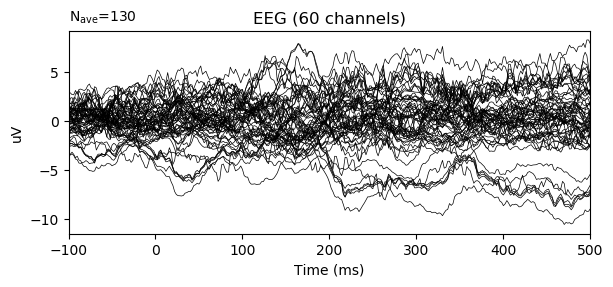

In [39]:

All_epochs = epochs

# Average them:
All_epocks_mean = All_epochs.average()
%matplotlib tk
# Plot their mean:
St_mean.plot()

### 3. Preprocessing

There are several options for processing epoched data with MNE. You may have noticed that the data in the plots above were quite noisy. One way to remove noise is to filter the data and apply baseline correction:

Setting up band-pass filter from 0.1 - 20 Hz
l_trans_bandwidth chosen to be 0.1 Hz
h_trans_bandwidth chosen to be 5.0 Hz
Filter length of 16501 samples (33.002 sec) selected
filter_length (16501) is longer than the signal (301), distortion is likely. Reduce filter length or filter a longer signal.


<ipython-input-44-56832864312c>:2: RuntimeWarning: filter_length (16501) is longer than the signal (301), distortion is likely. Reduce filter length or filter a longer signal.
  epochs.filter(l_freq = 0.1, h_freq = 20)


time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-44-56832864312c>:3: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  epochs.average().plot()


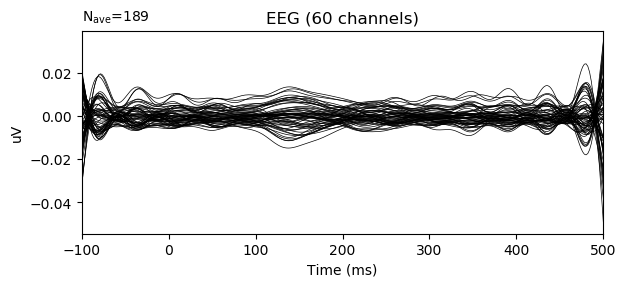

In [44]:
# filter the epoched data:
epochs.filter(l_freq = 0.1, h_freq = 20)
epochs.average().plot()

##### Exercise: try changing the filter settings. What happens?
Keep in mind that when filtering the data with 'epochs.filter', the original data will be altered. You need to make a copy or reload the data to use different filter settings now

Setting up band-pass filter from 30 - 80 Hz
l_trans_bandwidth chosen to be 7.5 Hz
h_trans_bandwidth chosen to be 20.0 Hz
Filter length of 221 samples (0.442 sec) selected
time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-41-1305bbb698b5>:3: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  epochs.average().plot()


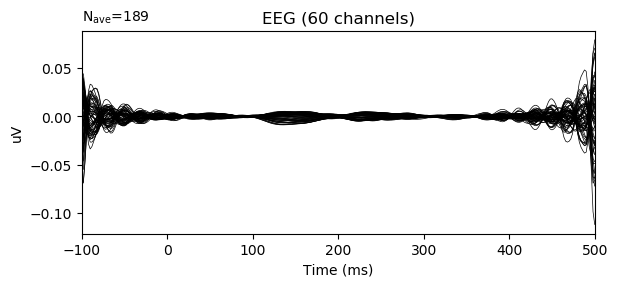

In [41]:
# filter the epoched data:
epochs.filter(l_freq = 30, h_freq = 80)
epochs.average().plot()

Now you can apply baseline correction and replot the data. What happens?

Applying baseline correction (mode: mean)
time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-45-8664755e3219>:3: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  epochs.average().plot()


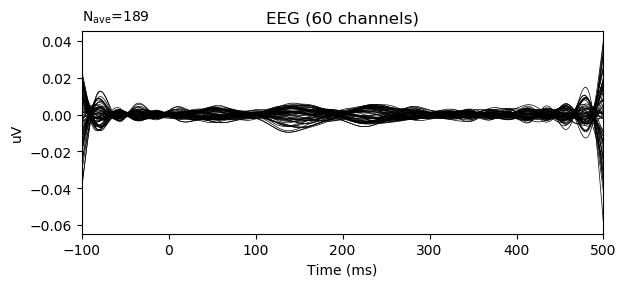

In [45]:
# Apply baseline correction:
epochs.apply_baseline((None, 0))
epochs.average().plot()

Another way to visualize average EEG responses is as an image:

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-46-a9509a910efd>:1: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  epochs.average().plot_image()


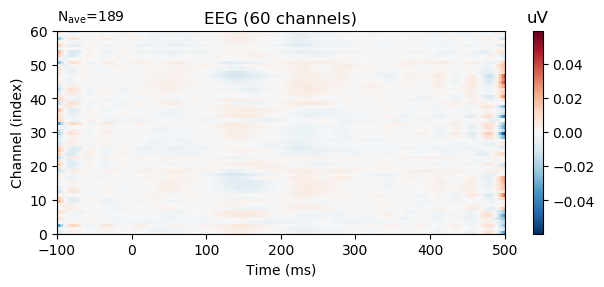

In [46]:
epochs.average().plot_image()

Or, as scalp topographies. This can be done as bellow:

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-48-a2fba63f2c28>:6: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  St_mean.plot_topomap(times, ch_type='eeg')


time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-48-a2fba63f2c28>:7: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  epochs.average().plot_topomap(times, ch_type='eeg')


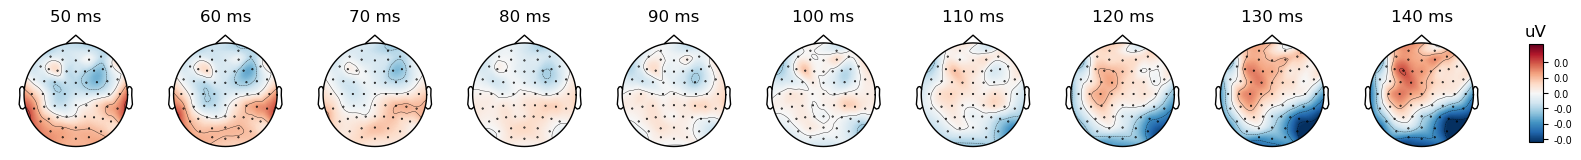

In [48]:
import numpy as np 

# define intervals for which we want to plot topographies:
times = np.arange(0.05, 0.15, 0.01)

St_mean.plot_topomap(times, ch_type='eeg')
epochs.average().plot_topomap(times, ch_type='eeg')


Can you now plot more time-points?

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-51-96c7807d11d6>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  epochs['Standard'].average().plot_topomap(times, ch_type='eeg')


time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-51-96c7807d11d6>:4: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  epochs['Novel'].average().plot_topomap(times, ch_type='eeg')


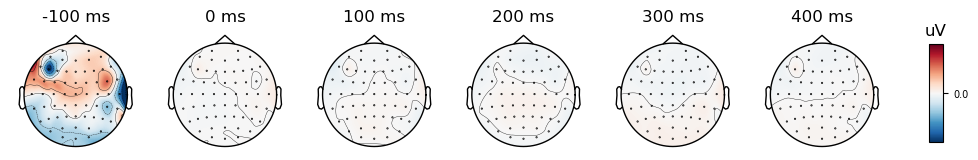

In [51]:
times = np.arange(-0.1, 0.5, 0.1)
epochs['Standard'].average().plot_topomap(times, ch_type='eeg')
times = np.arange(-0.1, 0.5, 0.1)
epochs['Novel'].average().plot_topomap(times, ch_type='eeg')

Epoch data can be saved. All preprocessing steps that have been applied on the data are saved as well (filters/baseline correction)

In [52]:
epochs.save(filename+"_preproc.fif") 

This filename (/home/tyler/courses_pip2018ml/neuro_course/817_1_PDDys_ODDBALL_Clean_curated_preproc.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz


<ipython-input-52-fbe823f64195>:1: RuntimeWarning: This filename (/home/tyler/courses_pip2018ml/neuro_course/817_1_PDDys_ODDBALL_Clean_curated_preproc.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs.save(filename+"_preproc.fif")
